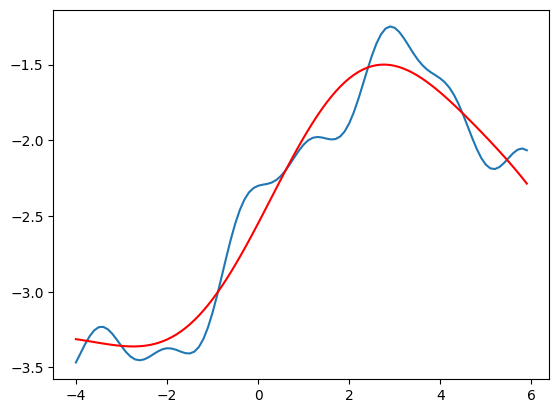

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt


def func(x):
    return np.sin(0.5*x) + 0.2 * np.cos(2*x) - 0.1 * np.sin(4 * x) - 2.5


def model(w, x):
    return w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 + w[4] * np.cos(x) + w[5] * np.sin(x)


# обучающая выборка
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

x_train = np.array([[x, x**2, x**3, np.cos(x), np.sin(x)] for x in coord_x])
y_train = coord_y

svr = svm.SVR(kernel='linear')
svr.fit(x_train, y_train)

w1 = svr.coef_[0] # w1, w2, ...
w0 = svr.intercept_[0]
w = [w0, *w1]

Q = np.mean([(model(w, x) - y) ** 2 for x, y in zip(coord_x, coord_y)])

plt.plot(coord_x, coord_y)
x_line = coord_x
y_line = [model(w, x) for x in x_line]
plt.plot(x_line, y_line, c='r')